<a href="https://colab.research.google.com/github/dbright123/Dbot-Advance/blob/main/lstm_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import MetaTrader5 as mt5
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt



In [ ]:
print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)

trade_active = mt5.initialize()

print(trade_active)

if not trade_active:
    print('Initialization failed, check internet connection. You must have Meta Trader 5 installed.')
    mt5.shutdown()

else:
    print(mt5.account_info()._asdict())
    print("\n")
    print(mt5.terminal_info()._asdict())
    print("\n")
    print(mt5.symbols_total())

MetaTrader5 package author:  MetaQuotes Ltd.
MetaTrader5 package version:  5.0.4200
True
{'login': 213644473, 'trade_mode': 0, 'leverage': 1000, 'limit_orders': 500, 'margin_so_mode': 0, 'trade_allowed': True, 'trade_expert': True, 'margin_mode': 2, 'currency_digits': 2, 'fifo_close': False, 'balance': 200.0, 'credit': 0.0, 'profit': 0.0, 'equity': 200.0, 'margin': 0.0, 'margin_free': 200.0, 'margin_level': 0.0, 'margin_so_call': 25.0, 'margin_so_so': 15.0, 'margin_initial': 0.0, 'margin_maintenance': 0.0, 'assets': 0.0, 'liabilities': 0.0, 'commission_blocked': 0.0, 'name': 'micheal bright omage ', 'server': 'OctaFX-Demo', 'currency': 'USD', 'company': 'Octa Markets Incorporated'}


{'community_account': False, 'community_connection': False, 'connected': True, 'dlls_allowed': False, 'trade_allowed': True, 'tradeapi_disabled': False, 'email_enabled': False, 'ftp_enabled': False, 'notifications_enabled': False, 'mqid': False, 'build': 5260, 'maxbars': 100000, 'codepage': 0, 'ping_last':

In [ ]:
account = mt5.account_info()
terminal = mt5.terminal_info()

print(account.equity)

if(terminal.connected == True and terminal.trade_allowed == True):
    print("AI is successfully functional")
else:
    print("Please make sure metatrade 5 has internet and algo Trade is Turn On")

200.0
AI is successfully functional


In [ ]:
symbols = mt5.symbols_get()
print(len(symbols))
t_symbol = []
for symbol in symbols:
    if "USD" in symbol.name:
        print("Yes ", symbol.name)
        t_symbol.append(symbol.name)

print(len(t_symbol))

280
Yes  EURUSD
Yes  GBPUSD
Yes  USDJPY
Yes  USDCHF
Yes  AUDUSD
Yes  NZDUSD
Yes  USDCAD
Yes  USDMXN
Yes  USDZAR
Yes  XAGUSD
Yes  XAUUSD
Yes  XBRUSD
Yes  XTIUSD
Yes  XNGUSD
Yes  BTCUSD
Yes  ETHUSD
Yes  LTCUSD
Yes  XRPUSD
Yes  BCHUSD
Yes  AAVEUSD
Yes  ADAUSD
Yes  ALGOUSD
Yes  ATOMUSD
Yes  AVAXUSD
Yes  AXSUSD
Yes  BNBUSD
Yes  DASHUSD
Yes  DOGEUSD
Yes  DOTUSD
Yes  FILUSD
Yes  GRTUSD
Yes  ICPUSD
Yes  IOTAUSD
Yes  LINKUSD
Yes  LRCUSD
Yes  MANAUSD
Yes  NEARUSD
Yes  SOLUSD
Yes  UNIUSD
Yes  ZECUSD
Yes  ETCUSD
Yes  TRXUSD
Yes  FETUSD
Yes  ARBUSD
Yes  APTUSD
Yes  SUIUSD
Yes  USDDKK
Yes  USDCZK
Yes  USDHUF
Yes  USDNOK
Yes  USDPLN
Yes  USDSEK
Yes  USDSGD
Yes  USDHKD
Yes  USDCNH
Yes  USDTRY
Yes  XBRUSD.Daily
Yes  XTIUSD.Daily
Yes  BTCUSD.Daily
Yes  ETHUSD.Daily
Yes  XRPUSD.Daily
Yes  LTCUSD.Daily
Yes  BCHUSD.Daily
Yes  LINKUSD.Daily
Yes  SOLUSD.Daily
65


In [ ]:
test_symbol = []
for t_s in t_symbol:
    market = mt5.copy_rates_from_pos(t_s, mt5.TIMEFRAME_H1, 0, 99999)
    if(len(market) > 80000):
        data = []
        for i in range(len(market)):
            data.append([market[i][1],market[i][2],market[i][3],market[i][4]])
        df = pd.DataFrame(data, columns=["open", "high","low", "close"])
        df.to_csv("Generated"+t_s+" dbot.csv", index=False)
        test_symbol.append(t_s)


In [ ]:

for t_s in test_symbol:
    market = mt5.copy_rates_from_pos(t_s, mt5.TIMEFRAME_D1, 0, 1000)
    if(len(market) > 900):
        data = []
        for i in range(len(market)):
            data.append([market[i][1],market[i][2],market[i][3],market[i][4]])
        df = pd.DataFrame(data, columns=["open", "high","low", "close"])
        df.to_csv("Generated"+t_s+" test.csv", index=False)



In [ ]:
import joblib

joblib.dump(t_symbol,"symbol.joblib")

['symbol.joblib']

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import joblib
import os
from sklearn.model_selection import train_test_split

In [3]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.0 MB/s eta 0:00:00


In [4]:
from tensorflow.keras.optimizers import SGD,Adam
import matplotlib.pyplot as plt



from tensorflow.keras import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, LayerNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import visualkeras

from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model

In [5]:
# Get the list of all files and directories in the specified path

dir_contents = os.listdir(".")
t_symbol = joblib.load("symbol.joblib")

In [6]:

# Filter the list to include only files, not directories
# os.path.join is used to create a full path for isfile() to check
files = [item for item in dir_contents]

file_target = []

for filename in files:
    for t_s in t_symbol:
        if t_s in filename  and "dbot.csv" in filename:
            print(filename)
            file_target.append(filename)
print("----------------------------------------------------")

print(len(file_target))

train_dfs = []
for f_t in file_target:
    train_dfs.append(pd.read_csv(f_t))


test_target = []

for filename in files:
    for t_s in t_symbol:
        if t_s in filename  and "test.csv" in filename:
            print(filename)
            test_target.append(filename)
print("----------------------------------------------------")

print(len(test_target))

train_dfs_test = []
for f_t in test_target:
    train_dfs_test.append(pd.read_csv(f_t))

GeneratedUSDMXN dbot.csv
GeneratedUSDZAR dbot.csv
GeneratedUSDCHF dbot.csv
GeneratedEURUSD dbot.csv
GeneratedAUDUSD dbot.csv
GeneratedUSDCAD dbot.csv
GeneratedNZDUSD dbot.csv
GeneratedGBPUSD dbot.csv
GeneratedUSDJPY dbot.csv
----------------------------------------------------
9
GeneratedUSDCAD test.csv
GeneratedEURUSD test.csv
GeneratedUSDJPY test.csv
GeneratedUSDCHF test.csv
GeneratedAUDUSD test.csv
GeneratedUSDZAR test.csv
GeneratedNZDUSD test.csv
GeneratedGBPUSD test.csv
GeneratedUSDMXN test.csv
----------------------------------------------------
9


In [7]:
def create_sequences(data_scaled, seq_len):
    """
    data_scaled: np.array shaped (n_rows, n_features)
    returns X (n_samples, seq_len, n_features), y (n_samples, n_features)
    where y is the row immediately following the window.
    """
    X, y = [], []
    n_rows = data_scaled.shape[0]
    for i in range(n_rows - seq_len):
        X.append(data_scaled[i:i+seq_len])
        y.append(data_scaled[i+seq_len])
    X = np.array(X)
    y = np.array(y)
    return X, y





GeneratedUSDMXN 


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 168, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 168, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,201 (1.11 MB)

 Trainable params: 292,201 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Epoch 1/100

Epoch 1: val_loss improved from inf to 0.00076, saving model to GeneratedUSDMXN lstm_best.keras
37/37 - 29s - 772ms/step - loss: 0.0270 - mae: 0.1094 - mape: 43.7048 - msle: 0.0145 - root_mean_squared_error: 0.1644 - val_loss: 7.6113e-04 - val_mae: 0.0240 - val_mape: 589.8539 - val_msle: 4.2653e-04 - val_root_mean_squared_error: 0.0276 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_loss improved from 0.00076 to 0.00007, saving model to GeneratedUSDMXN lstm_best.keras
37/37 - 16s - 432ms/step - loss: 0.0030 - mae: 0.0380 - mape: 12.2429 - msle: 0.0013 - root_mean_squared_error: 0.0545 - val_loss: 7.1683e-05 - val_mae: 0.0056 - val_mape: 283.1308 - val_msle: 3.2609e-05 - val_root_mean_squared_error: 0.0085 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_loss did not improve from 0.00007
37/37 - 21s - 557ms/step - loss: 0.0017 - mae: 0.0292 - mape: 8.7307 - msle: 7.3456e-04 - root_mean_squared_error: 0.0417 - val_loss: 9.0396e-05 - val_mae: 0.0067 - val_mape: 149

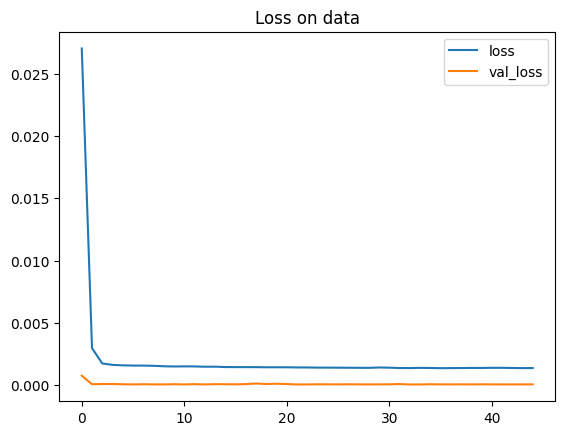

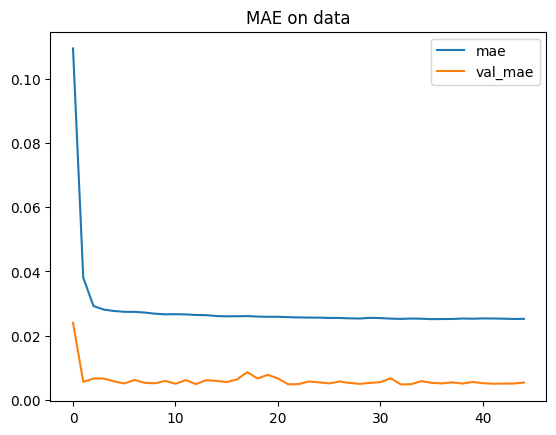

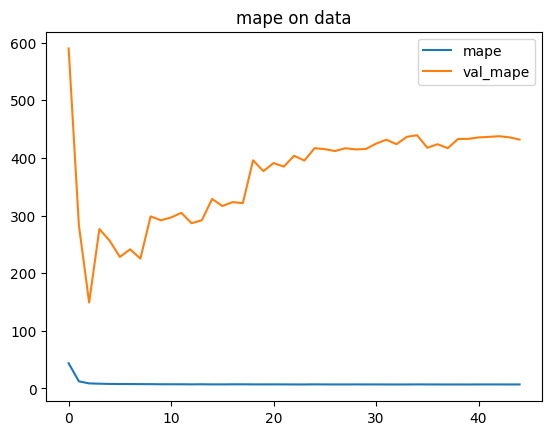

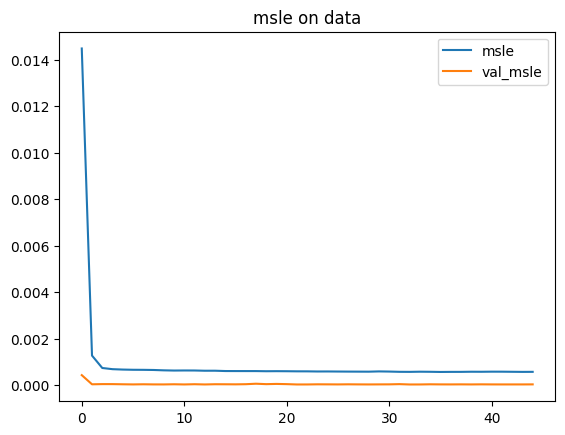

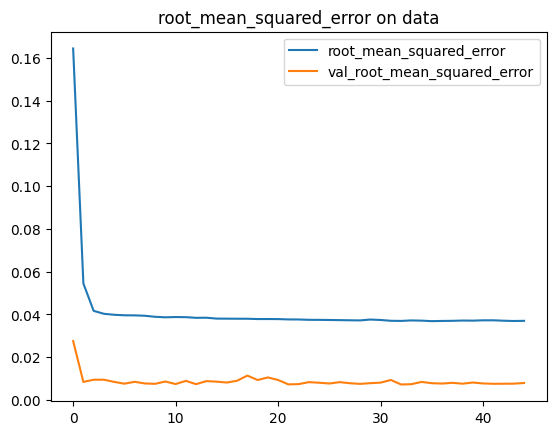

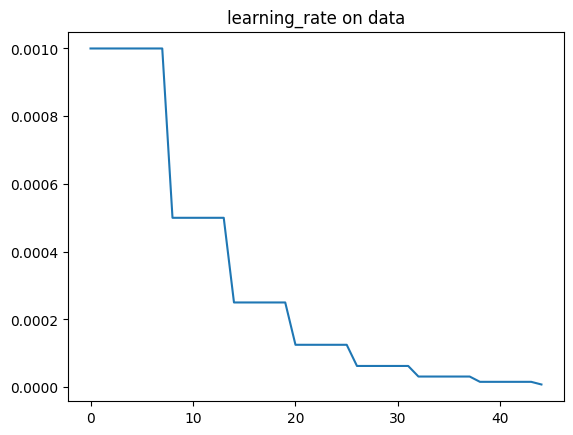

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
R^2 value for  GeneratedUSDMXN 
0.9990966033540734


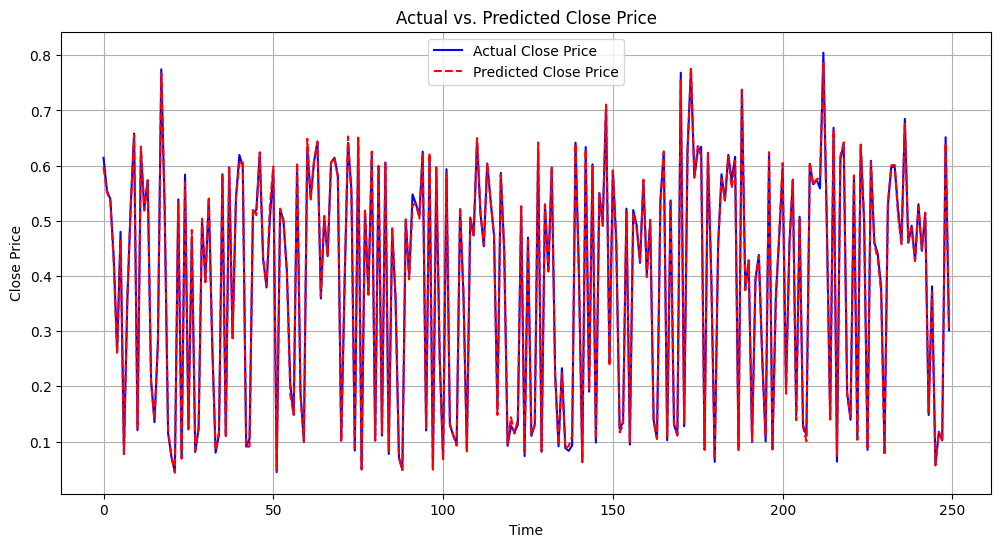

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R^2 value for test  GeneratedUSDMXN 
-19087.41498511548


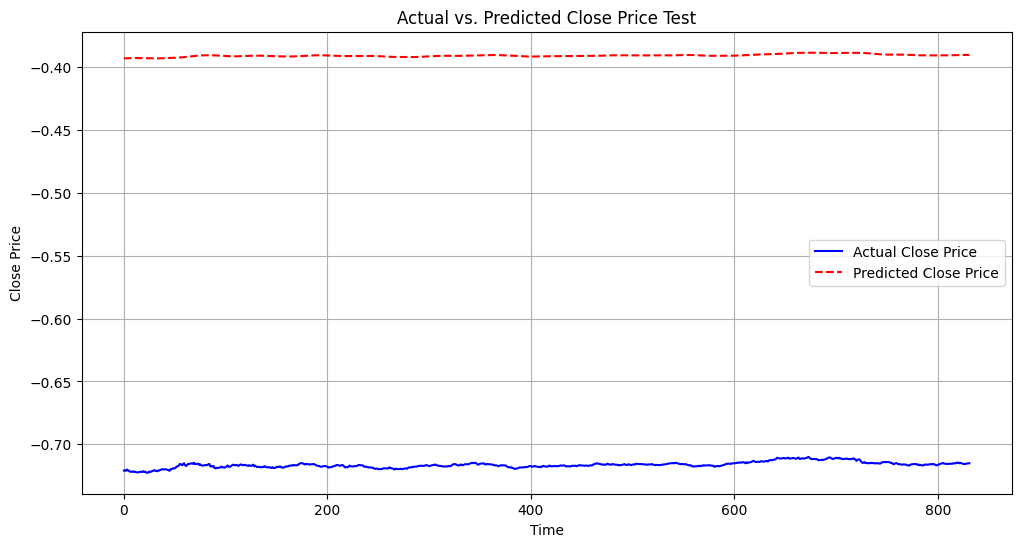

GeneratedUSDZAR 


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 168, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 168, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,201 (1.11 MB)

 Trainable params: 292,201 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Epoch 1/100

Epoch 1: val_loss improved from inf to 0.00081, saving model to GeneratedUSDZAR lstm_best.keras
31/31 - 17s - 548ms/step - loss: 0.0388 - mae: 0.1263 - mape: 1017.5292 - msle: 0.0178 - root_mean_squared_error: 0.1969 - val_loss: 8.0527e-04 - val_mae: 0.0241 - val_mape: 17.8569 - val_msle: 5.1862e-04 - val_root_mean_squared_error: 0.0284 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_loss improved from 0.00081 to 0.00010, saving model to GeneratedUSDZAR lstm_best.keras
31/31 - 14s - 438ms/step - loss: 0.0046 - mae: 0.0452 - mape: 1355.6317 - msle: 0.0017 - root_mean_squared_error: 0.0682 - val_loss: 9.9597e-05 - val_mae: 0.0071 - val_mape: 8.1047 - val_msle: 4.2522e-05 - val_root_mean_squared_error: 0.0100 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_loss improved from 0.00010 to 0.00005, saving model to GeneratedUSDZAR lstm_best.keras
31/31 - 13s - 430ms/step - loss: 0.0030 - mae: 0.0345 - mape: 1165.8771 - msle: 0.0010 - root_mean_squared_error: 0.0544 - v

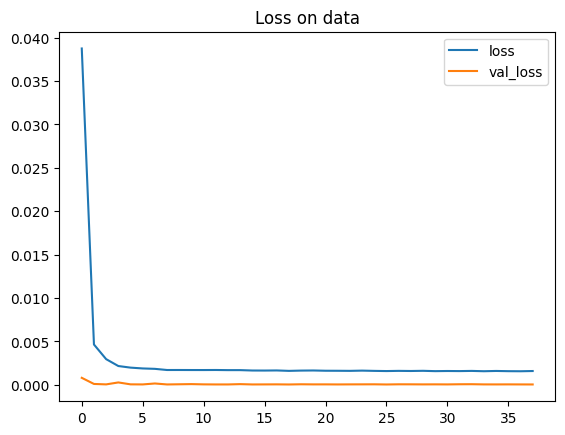

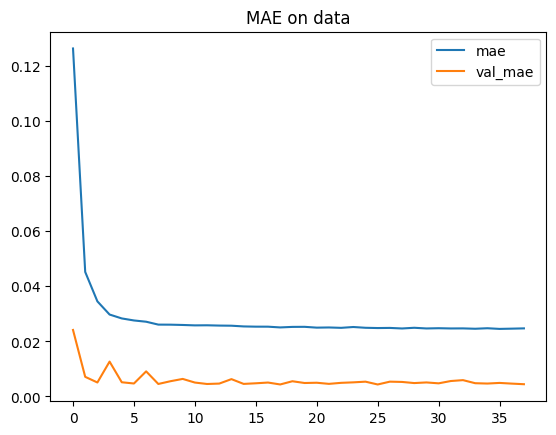

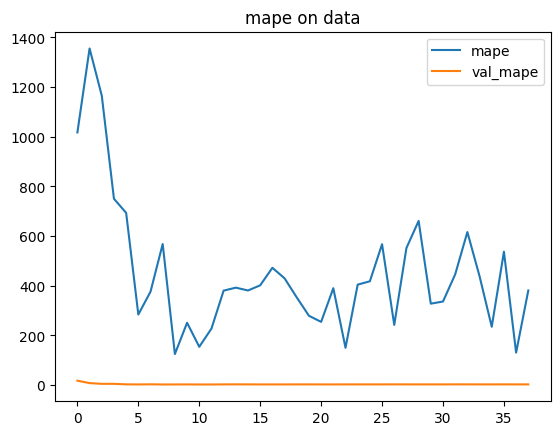

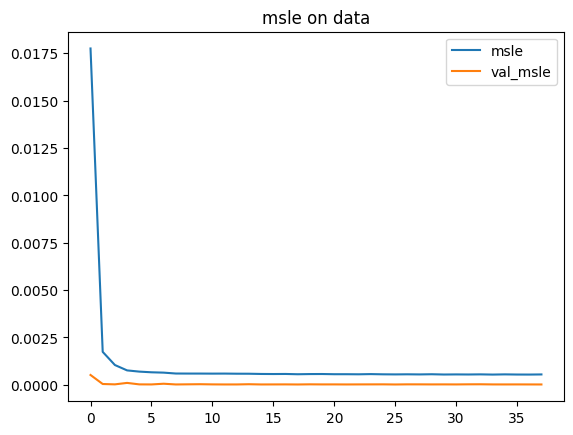

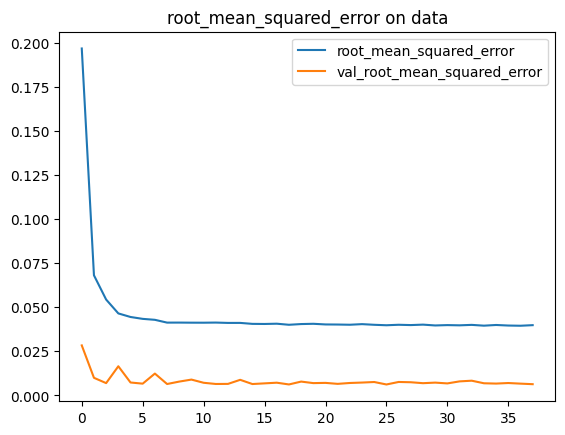

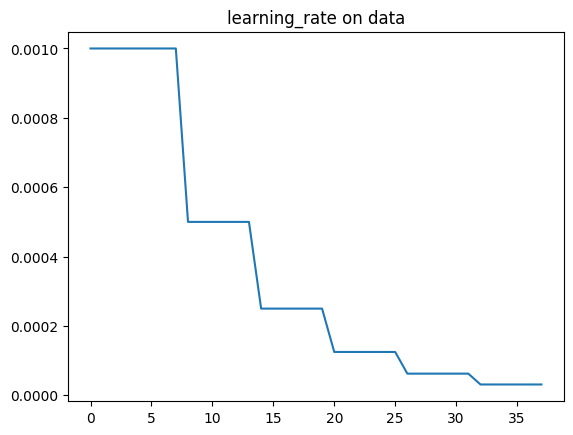

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
R^2 value for  GeneratedUSDZAR 
0.9996857670282907


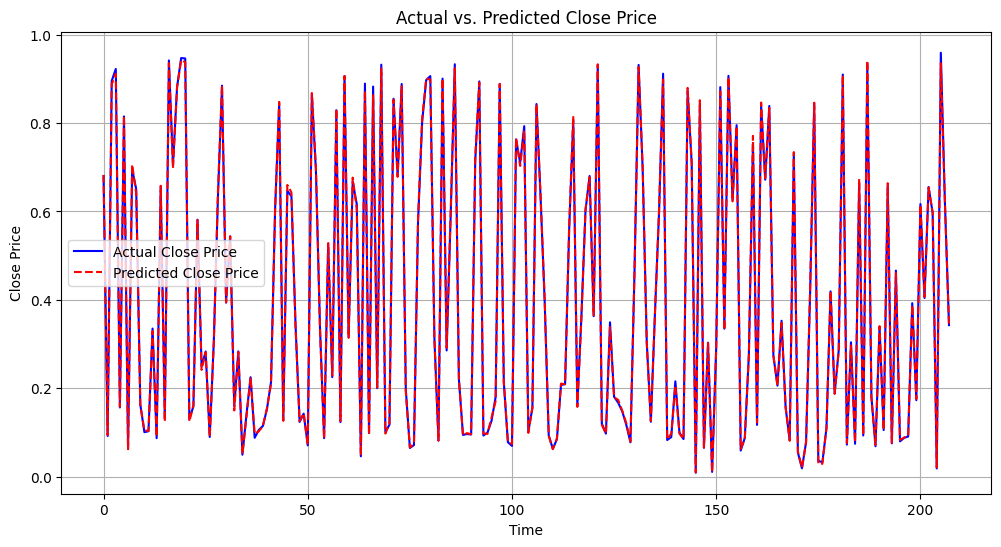

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R^2 value for test  GeneratedUSDZAR 
-5616.670280802473


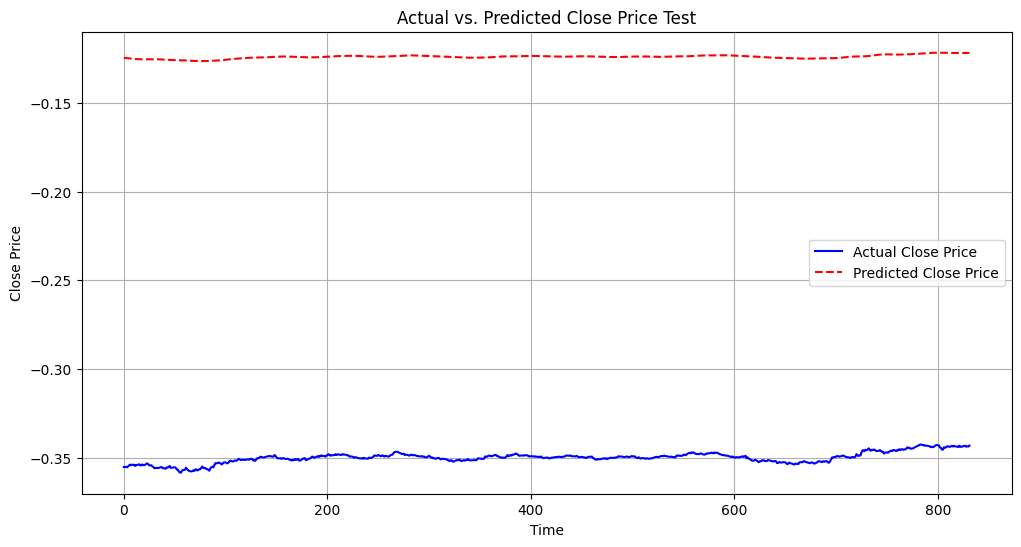

GeneratedUSDCHF 


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 168, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 168, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,201 (1.11 MB)

 Trainable params: 292,201 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Epoch 1/100

Epoch 1: val_loss improved from inf to 0.00491, saving model to GeneratedUSDCHF lstm_best.keras
37/37 - 20s - 547ms/step - loss: 0.0326 - mae: 0.1329 - mape: 3626.6343 - msle: 0.0158 - root_mean_squared_error: 0.1805 - val_loss: 0.0049 - val_mae: 0.0538 - val_mape: 11.0027 - val_msle: 0.0020 - val_root_mean_squared_error: 0.0701 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_loss improved from 0.00491 to 0.00057, saving model to GeneratedUSDCHF lstm_best.keras
37/37 - 16s - 435ms/step - loss: 0.0049 - mae: 0.0548 - mape: 2604.6990 - msle: 0.0022 - root_mean_squared_error: 0.0702 - val_loss: 5.7441e-04 - val_mae: 0.0178 - val_mape: 3.9393 - val_msle: 2.3817e-04 - val_root_mean_squared_error: 0.0240 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_loss improved from 0.00057 to 0.00015, saving model to GeneratedUSDCHF lstm_best.keras
37/37 - 21s - 572ms/step - loss: 0.0029 - mae: 0.0414 - mape: 1284.9158 - msle: 0.0012 - root_mean_squared_error: 0.0534 - val_loss:

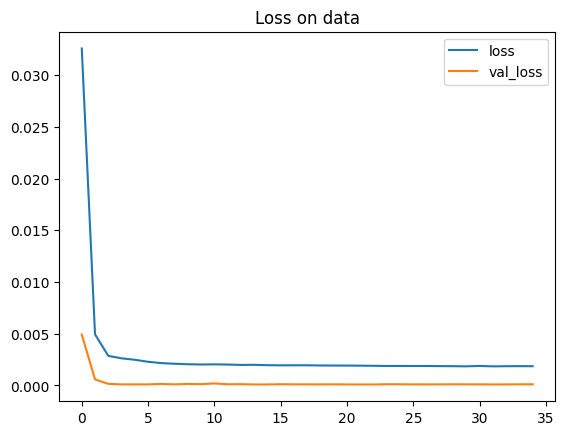

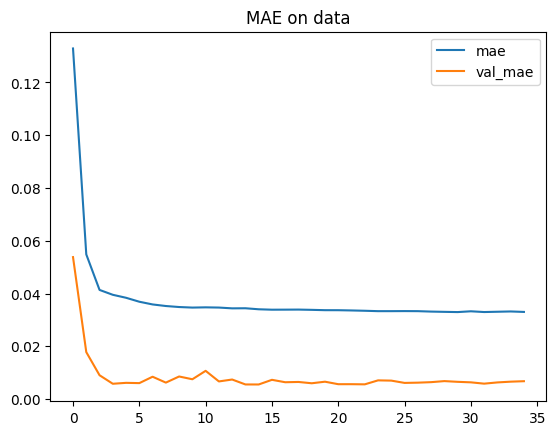

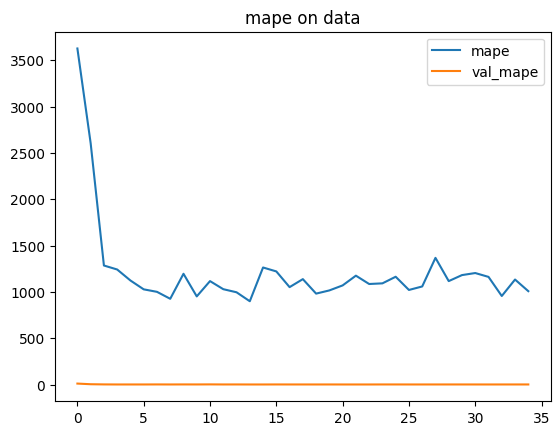

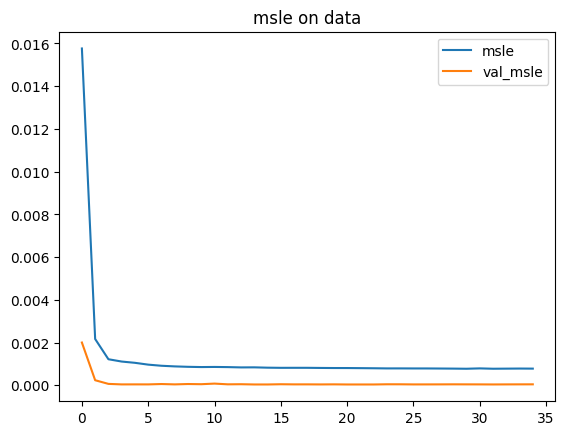

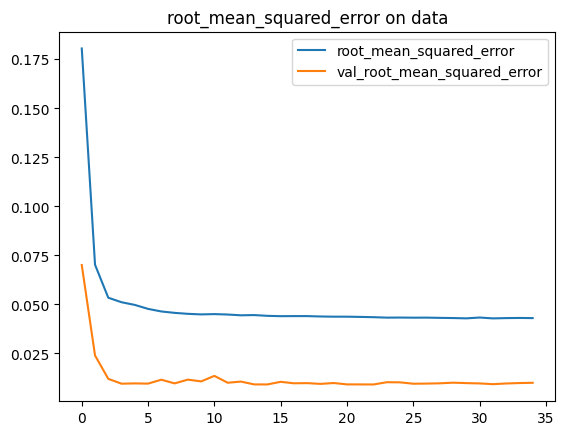

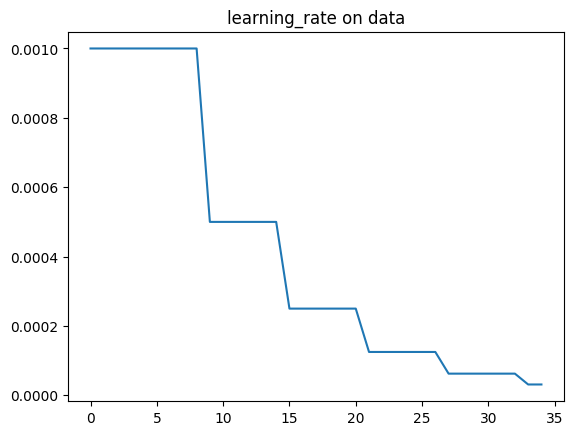

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
R^2 value for  GeneratedUSDCHF 
0.9968137182644246


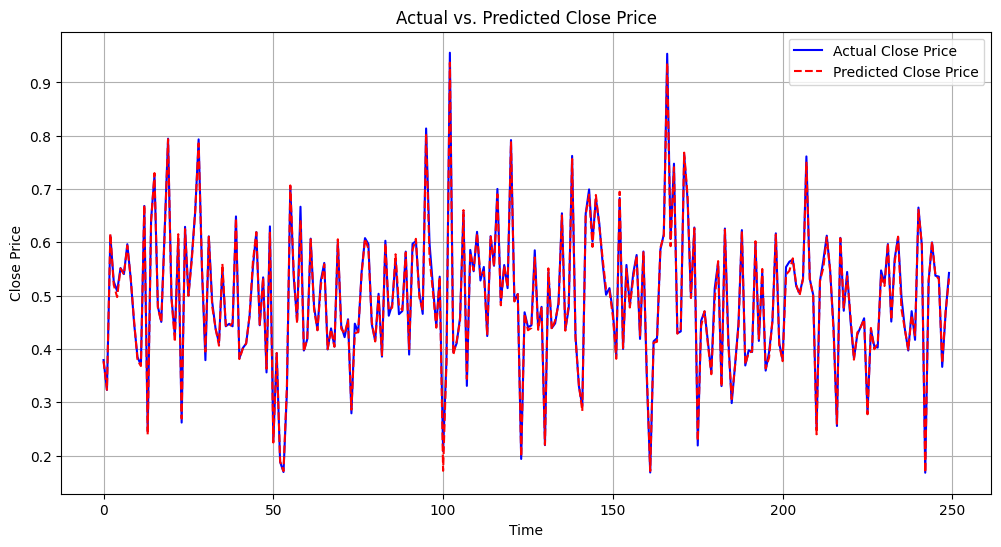

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R^2 value for test  GeneratedUSDCHF 
-377.0310844778866


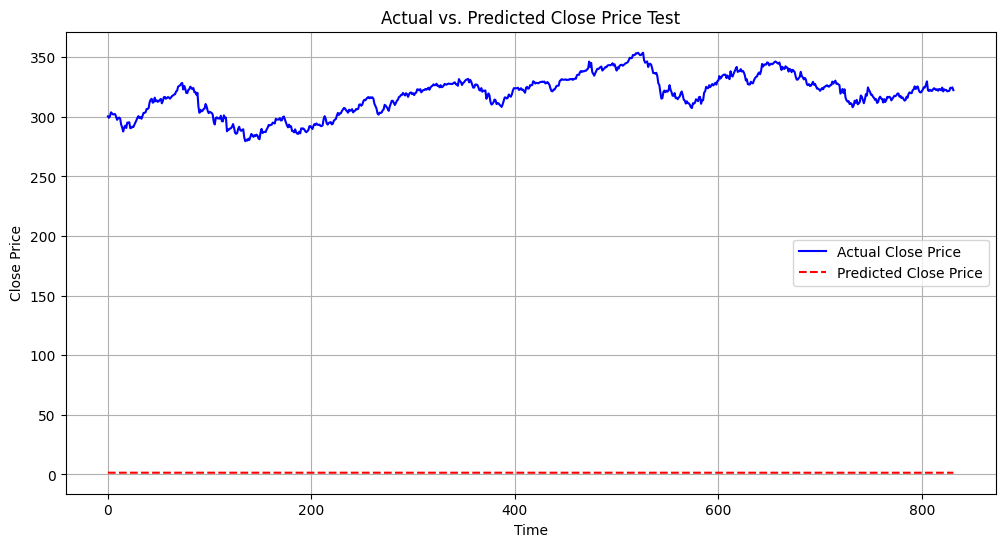

GeneratedEURUSD 


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 168, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 168, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,201 (1.11 MB)

 Trainable params: 292,201 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Epoch 1/100

Epoch 1: val_loss improved from inf to 0.00045, saving model to GeneratedEURUSD lstm_best.keras
37/37 - 20s - 553ms/step - loss: 0.0254 - mae: 0.1015 - mape: 550.3568 - msle: 0.0133 - root_mean_squared_error: 0.1595 - val_loss: 4.4809e-04 - val_mae: 0.0193 - val_mape: 6.2247 - val_msle: 2.5227e-04 - val_root_mean_squared_error: 0.0212 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_loss improved from 0.00045 to 0.00021, saving model to GeneratedEURUSD lstm_best.keras
37/37 - 16s - 433ms/step - loss: 0.0027 - mae: 0.0374 - mape: 437.1839 - msle: 0.0011 - root_mean_squared_error: 0.0522 - val_loss: 2.1155e-04 - val_mae: 0.0123 - val_mape: 3.5169 - val_msle: 9.6689e-05 - val_root_mean_squared_error: 0.0145 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_loss improved from 0.00021 to 0.00007, saving model to GeneratedEURUSD lstm_best.keras
37/37 - 21s - 556ms/step - loss: 0.0023 - mae: 0.0346 - mape: 56.1603 - msle: 9.5304e-04 - root_mean_squared_error: 0.0484 - va

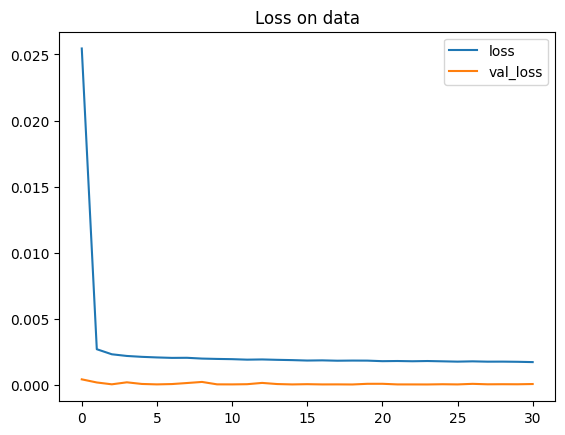

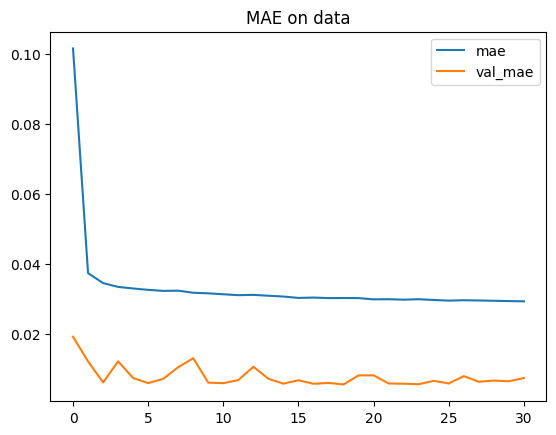

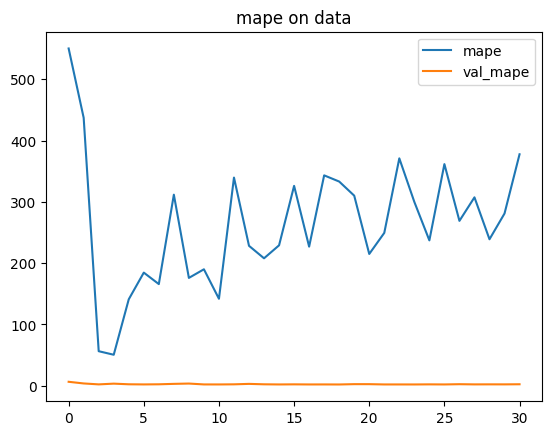

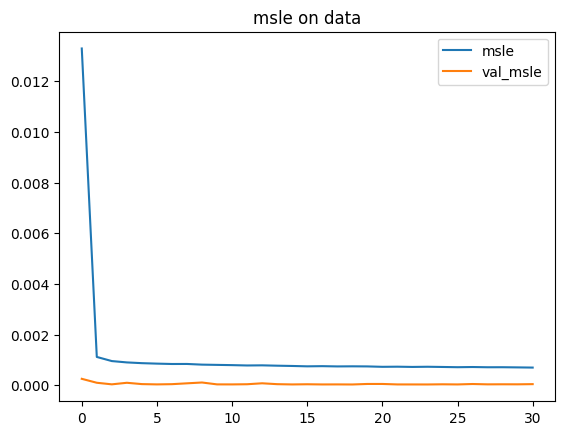

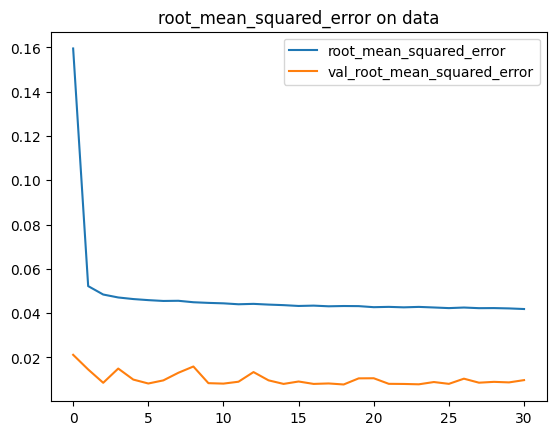

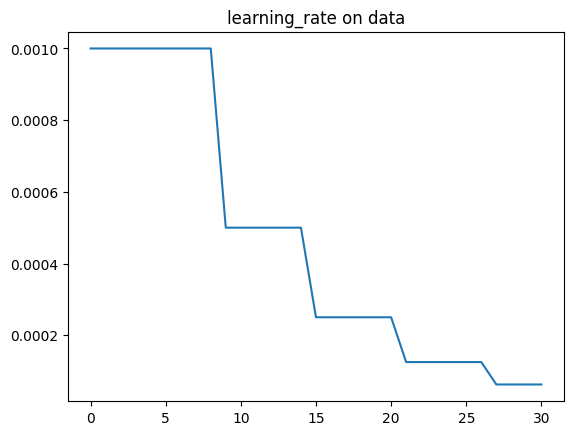

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
R^2 value for  GeneratedEURUSD 
0.99879326789814


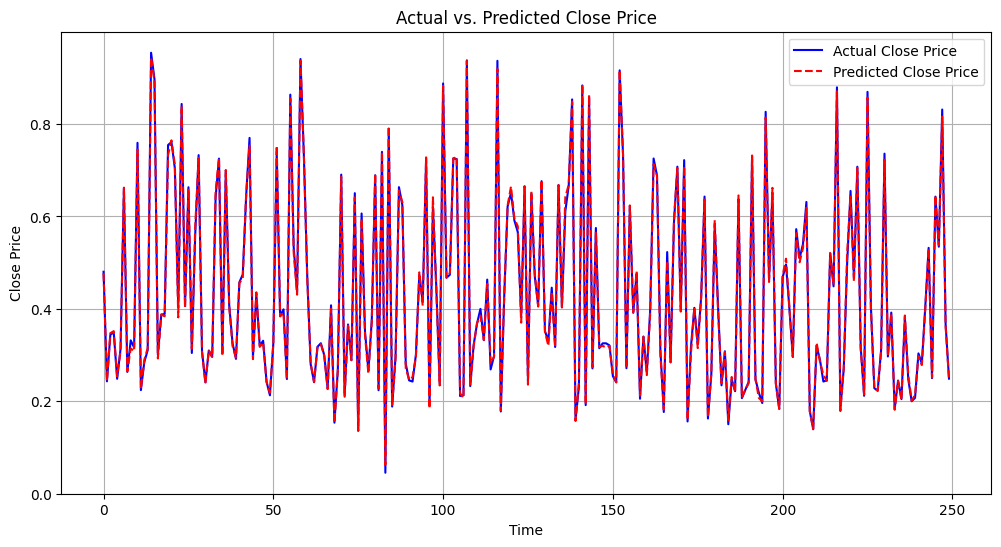

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R^2 value for test  GeneratedEURUSD 
-0.38438367467579204


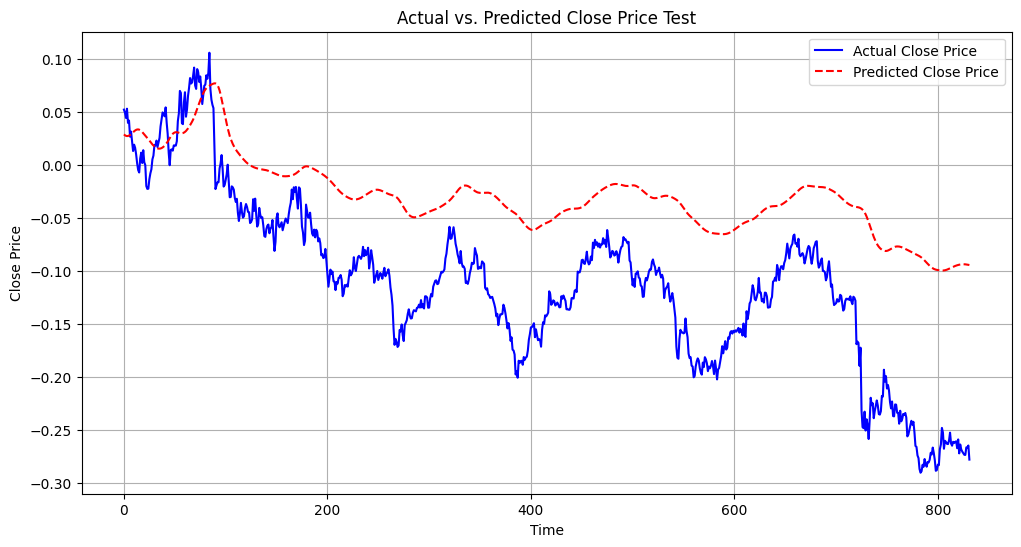

GeneratedAUDUSD 


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 168, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 168, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,201 (1.11 MB)

 Trainable params: 292,201 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Epoch 1/100

Epoch 1: val_loss improved from inf to 0.00285, saving model to GeneratedAUDUSD lstm_best.keras
37/37 - 21s - 563ms/step - loss: 0.0381 - mae: 0.1346 - mape: 45.6688 - msle: 0.0179 - root_mean_squared_error: 0.1951 - val_loss: 0.0029 - val_mae: 0.0413 - val_mape: 8.1811 - val_msle: 0.0010 - val_root_mean_squared_error: 0.0534 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_loss improved from 0.00285 to 0.00011, saving model to GeneratedAUDUSD lstm_best.keras
37/37 - 16s - 439ms/step - loss: 0.0032 - mae: 0.0402 - mape: 904.9593 - msle: 0.0013 - root_mean_squared_error: 0.0570 - val_loss: 1.1472e-04 - val_mae: 0.0086 - val_mape: 2.6912 - val_msle: 5.4444e-05 - val_root_mean_squared_error: 0.0107 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_loss improved from 0.00011 to 0.00008, saving model to GeneratedAUDUSD lstm_best.keras
37/37 - 21s - 569ms/step - loss: 0.0025 - mae: 0.0347 - mape: 1121.6935 - msle: 9.4839e-04 - root_mean_squared_error: 0.0497 - val_loss:

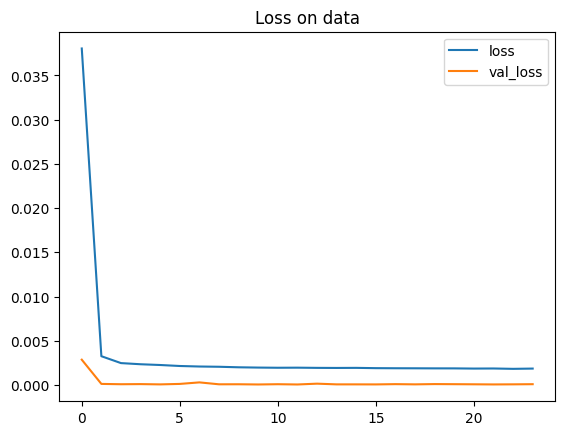

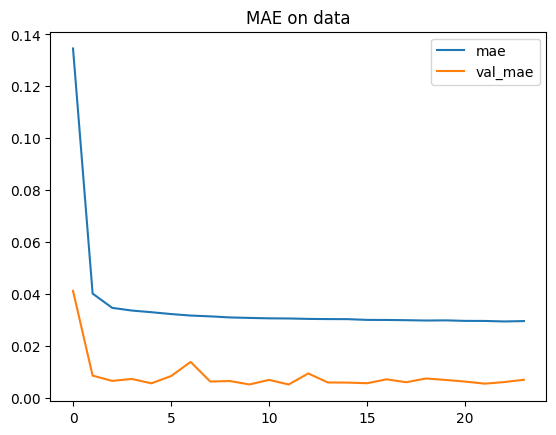

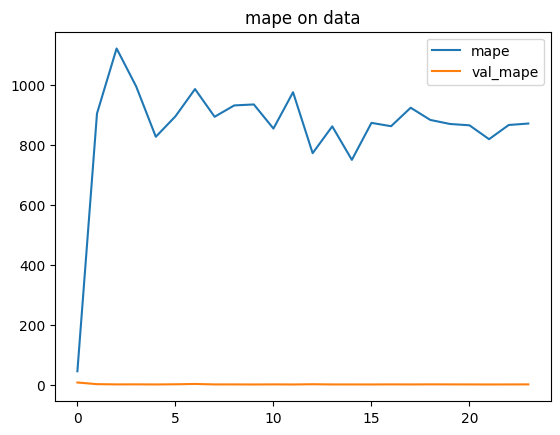

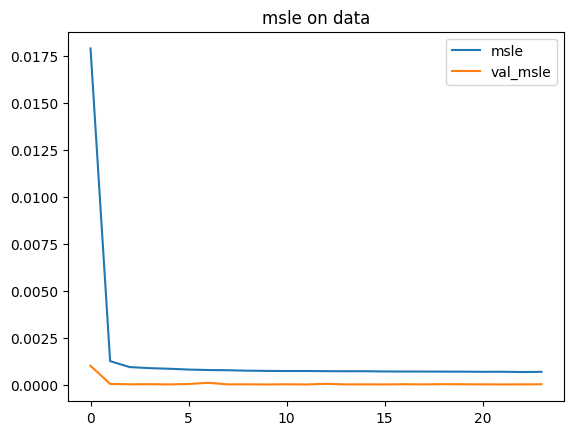

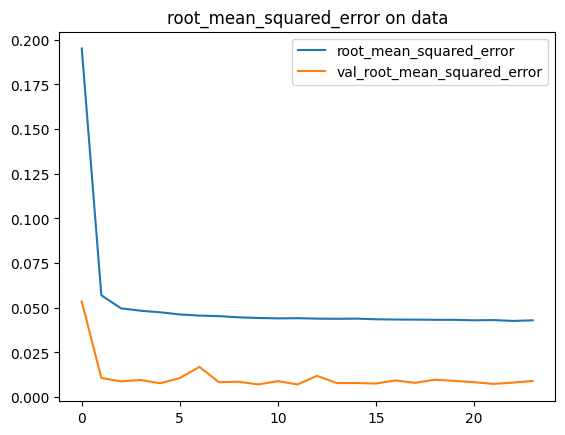

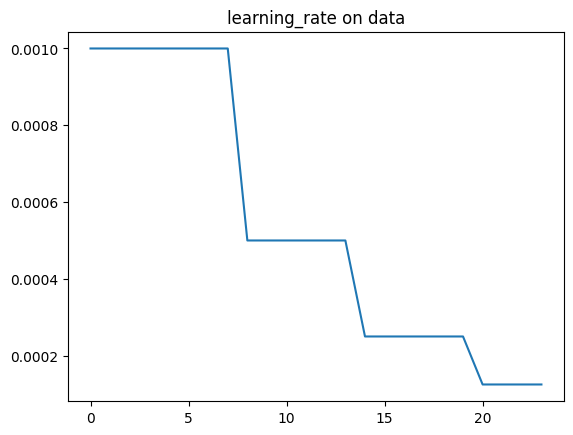

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
R^2 value for  GeneratedAUDUSD 
0.9990850963912954


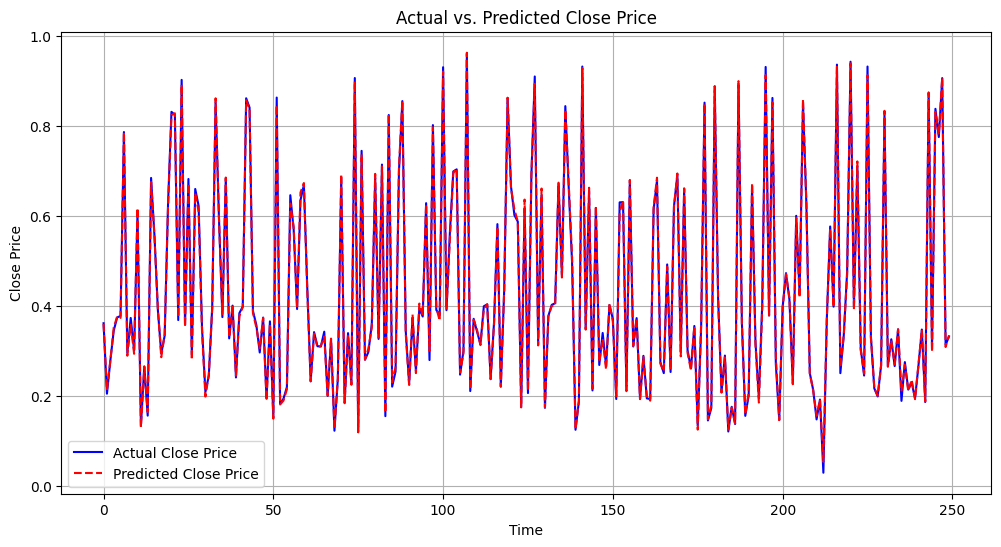

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R^2 value for test  GeneratedAUDUSD 
0.5941526759287137


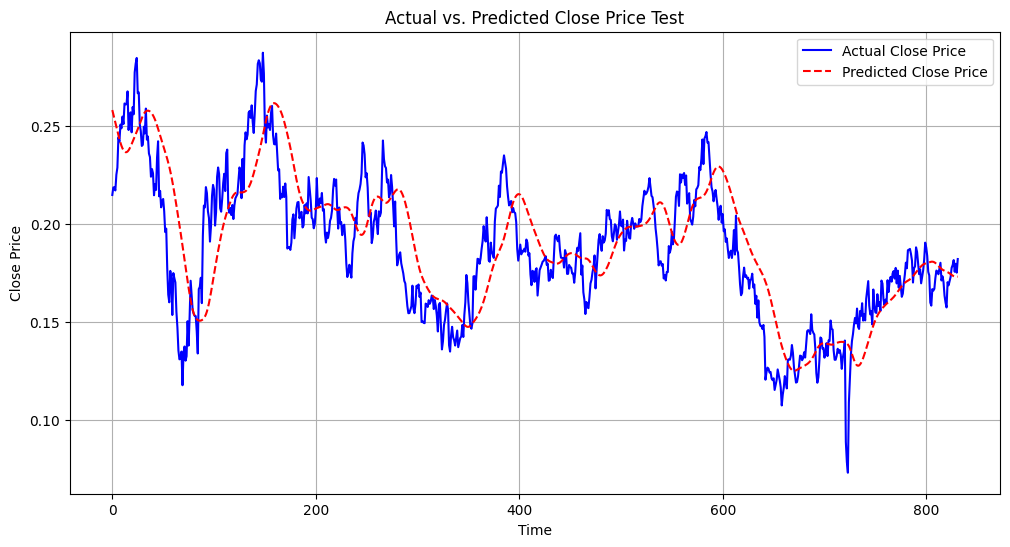

GeneratedUSDCAD 


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 168, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 168, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,201 (1.11 MB)

 Trainable params: 292,201 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Epoch 1/100

Epoch 1: val_loss improved from inf to 0.00078, saving model to GeneratedUSDCAD lstm_best.keras
37/37 - 21s - 558ms/step - loss: 0.0435 - mae: 0.1437 - mape: 1497.9069 - msle: 0.0205 - root_mean_squared_error: 0.2085 - val_loss: 7.7777e-04 - val_mae: 0.0247 - val_mape: 6.1082 - val_msle: 3.0546e-04 - val_root_mean_squared_error: 0.0279 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_loss improved from 0.00078 to 0.00012, saving model to GeneratedUSDCAD lstm_best.keras
37/37 - 19s - 513ms/step - loss: 0.0046 - mae: 0.0493 - mape: 492.1455 - msle: 0.0017 - root_mean_squared_error: 0.0676 - val_loss: 1.1571e-04 - val_mae: 0.0080 - val_mape: 3.2203 - val_msle: 4.8872e-05 - val_root_mean_squared_error: 0.0108 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_loss did not improve from 0.00012
37/37 - 16s - 433ms/step - loss: 0.0034 - mae: 0.0418 - mape: 401.3619 - msle: 0.0012 - root_mean_squared_error: 0.0583 - val_loss: 1.6119e-04 - val_mae: 0.0102 - val_mape: 3.4144

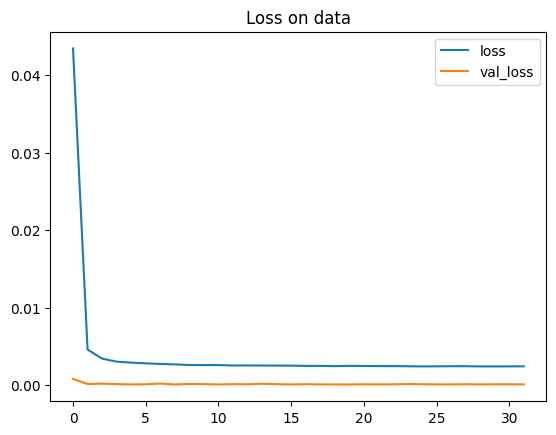

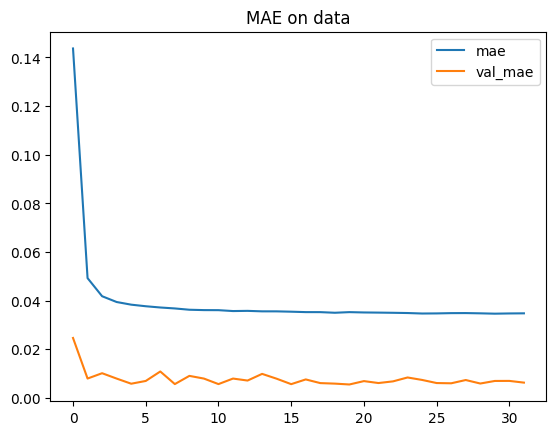

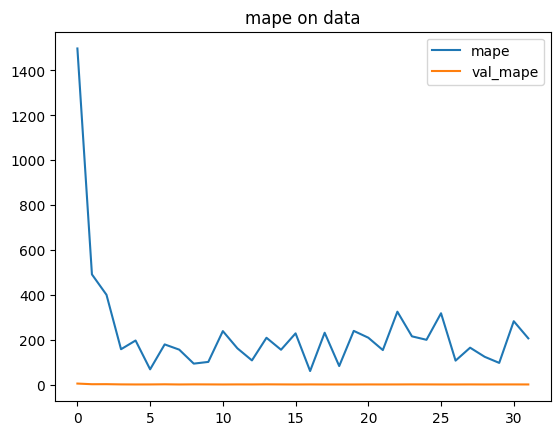

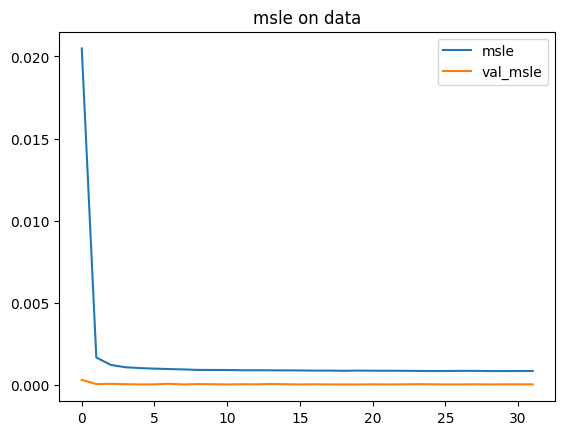

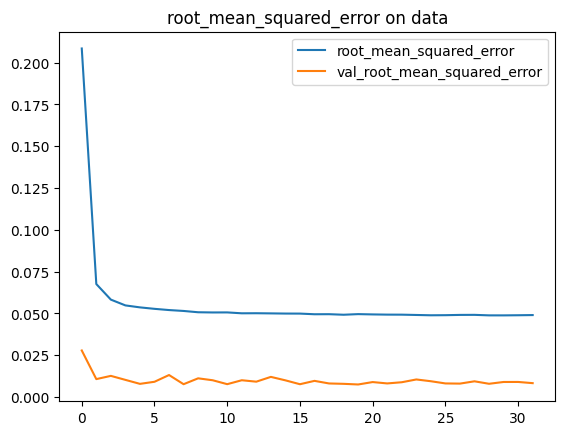

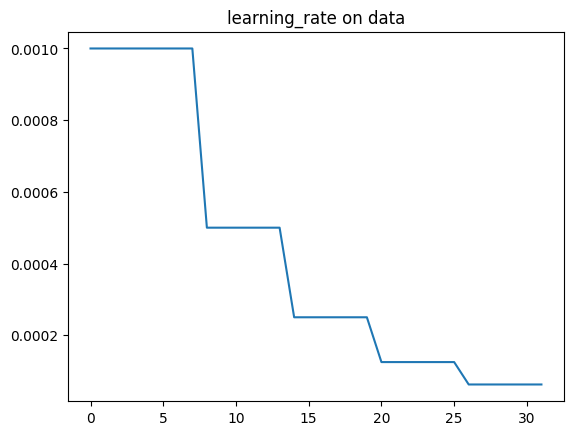

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
R^2 value for  GeneratedUSDCAD 
0.9991500823355288


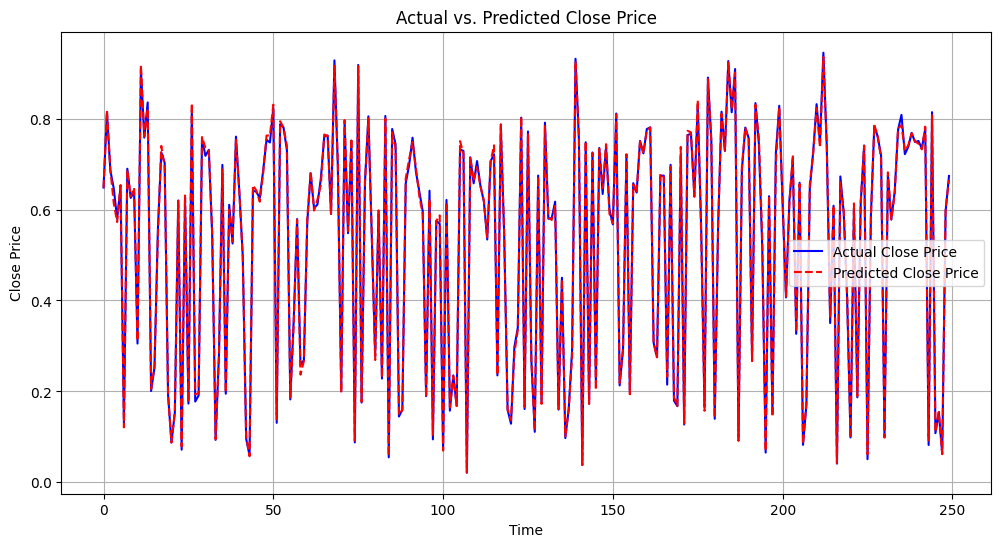

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R^2 value for test  GeneratedUSDCAD 
-551.0886384394967


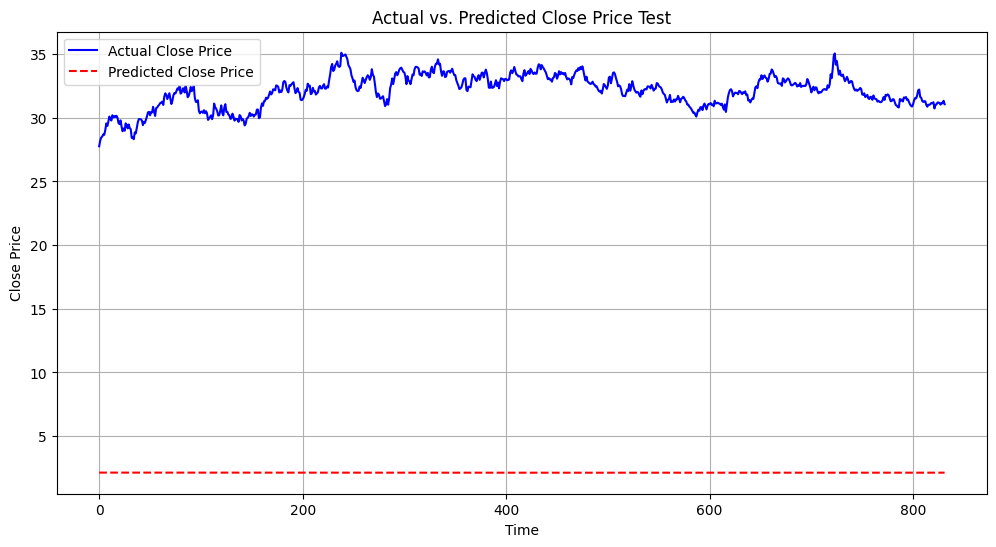

GeneratedNZDUSD 


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 168, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_24 (LSTM)                  │ (None, 168, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,201 (1.11 MB)

 Trainable params: 292,201 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Epoch 1/100

Epoch 1: val_loss improved from inf to 0.00369, saving model to GeneratedNZDUSD lstm_best.keras
37/37 - 20s - 533ms/step - loss: 0.0411 - mae: 0.1436 - mape: 39.0795 - msle: 0.0193 - root_mean_squared_error: 0.2027 - val_loss: 0.0037 - val_mae: 0.0453 - val_mape: 4988.4600 - val_msle: 0.0013 - val_root_mean_squared_error: 0.0608 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_loss improved from 0.00369 to 0.00017, saving model to GeneratedNZDUSD lstm_best.keras
37/37 - 21s - 559ms/step - loss: 0.0046 - mae: 0.0487 - mape: 11.5080 - msle: 0.0018 - root_mean_squared_error: 0.0677 - val_loss: 1.6738e-04 - val_mae: 0.0098 - val_mape: 4440.8779 - val_msle: 7.4557e-05 - val_root_mean_squared_error: 0.0129 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_loss improved from 0.00017 to 0.00013, saving model to GeneratedNZDUSD lstm_best.keras
37/37 - 17s - 454ms/step - loss: 0.0033 - mae: 0.0412 - mape: 9.5918 - msle: 0.0013 - root_mean_squared_error: 0.0575 - val_loss: 1

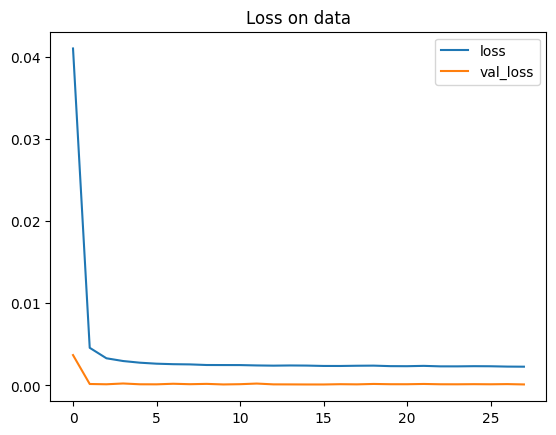

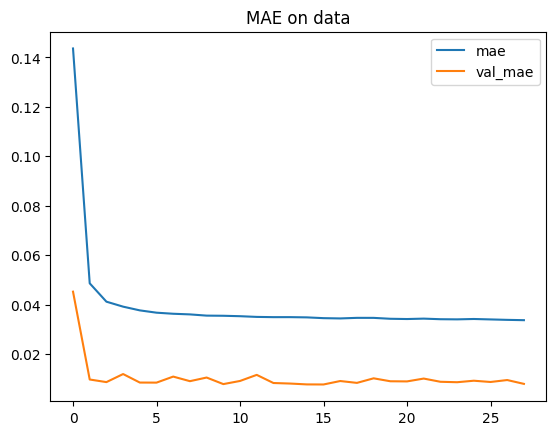

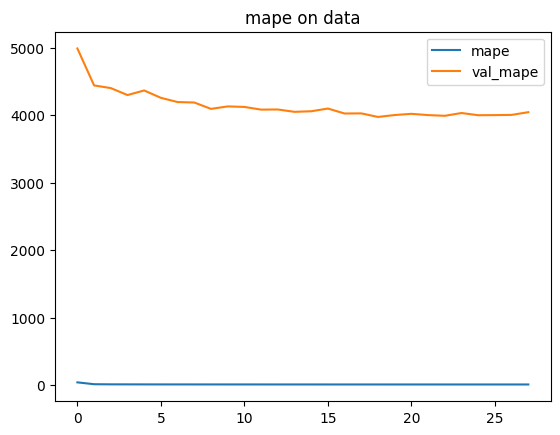

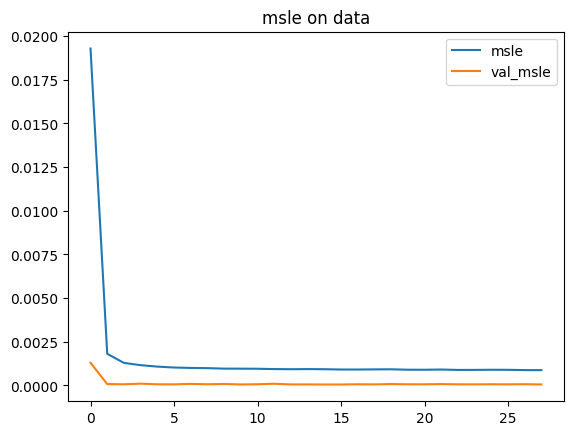

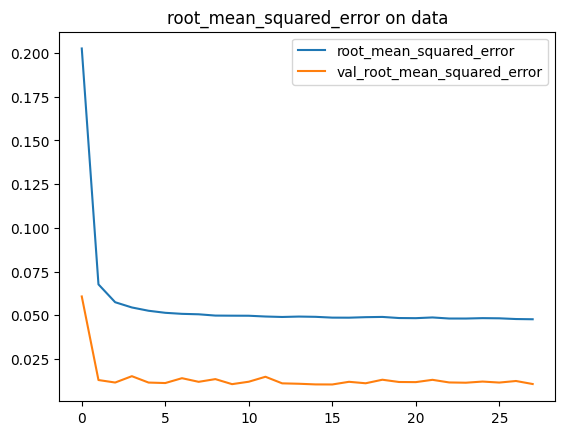

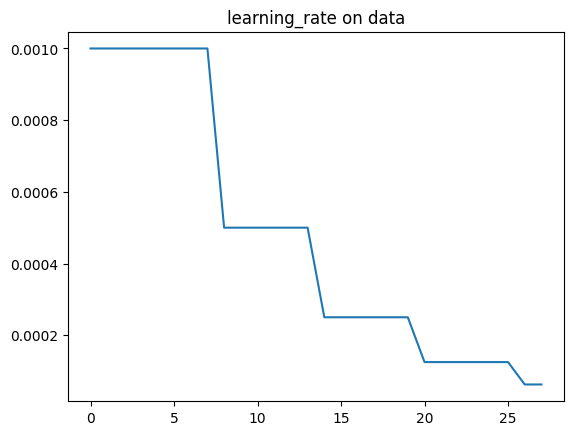

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step
R^2 value for  GeneratedNZDUSD 
0.9983221361772056


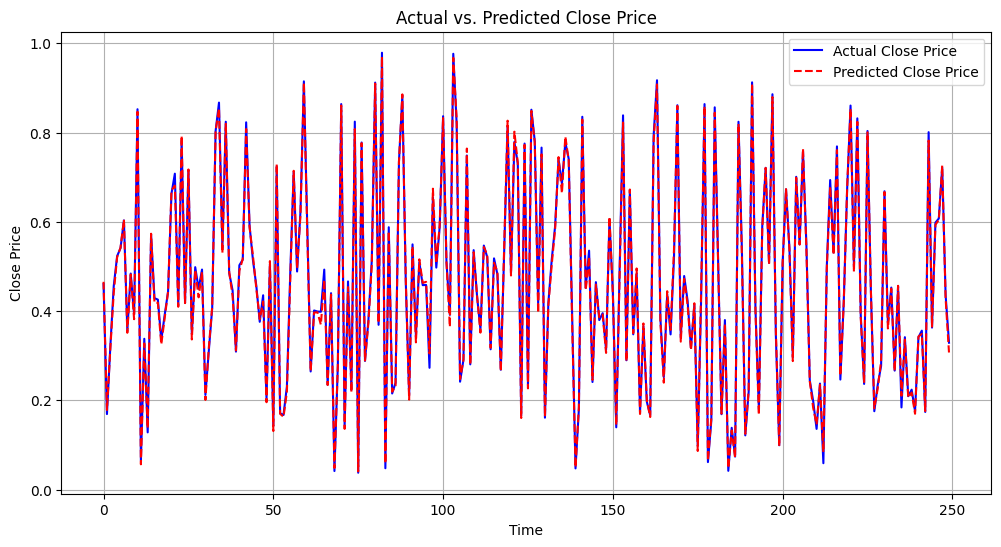

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R^2 value for test  GeneratedNZDUSD 
0.6238755649954333


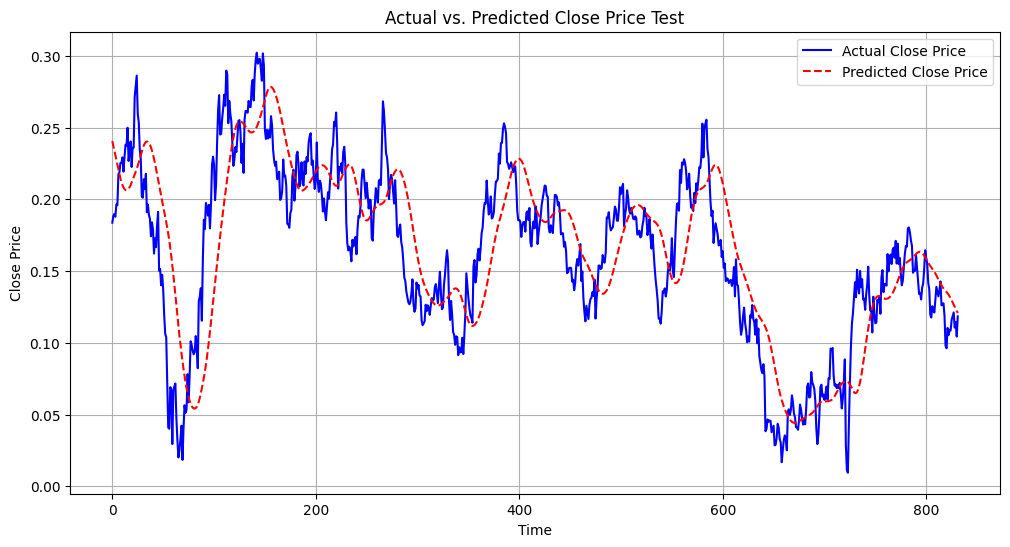

GeneratedGBPUSD 


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 168, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 168, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,201 (1.11 MB)

 Trainable params: 292,201 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Epoch 1/100

Epoch 1: val_loss improved from inf to 0.00039, saving model to GeneratedGBPUSD lstm_best.keras
37/37 - 20s - 540ms/step - loss: 0.0427 - mae: 0.1415 - mape: 27.4306 - msle: 0.0202 - root_mean_squared_error: 0.2065 - val_loss: 3.8814e-04 - val_mae: 0.0177 - val_mape: 4909.8965 - val_msle: 1.7626e-04 - val_root_mean_squared_error: 0.0197 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_loss improved from 0.00039 to 0.00010, saving model to GeneratedGBPUSD lstm_best.keras
37/37 - 20s - 539ms/step - loss: 0.0055 - mae: 0.0550 - mape: 10.1426 - msle: 0.0021 - root_mean_squared_error: 0.0744 - val_loss: 1.0103e-04 - val_mae: 0.0073 - val_mape: 4624.8579 - val_msle: 3.9853e-05 - val_root_mean_squared_error: 0.0101 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_loss did not improve from 0.00010
37/37 - 21s - 570ms/step - loss: 0.0039 - mae: 0.0462 - mape: 8.4931 - msle: 0.0014 - root_mean_squared_error: 0.0628 - val_loss: 1.3614e-04 - val_mae: 0.0093 - val_mape: 4645.

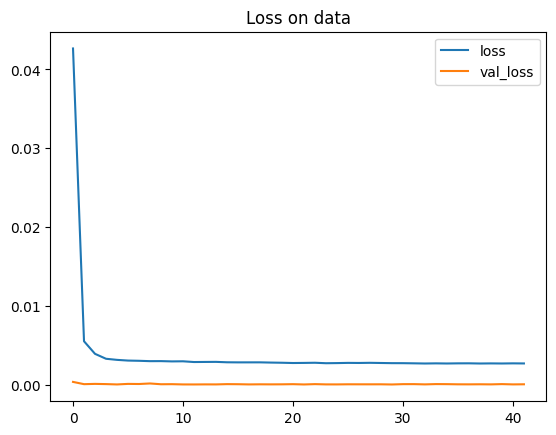

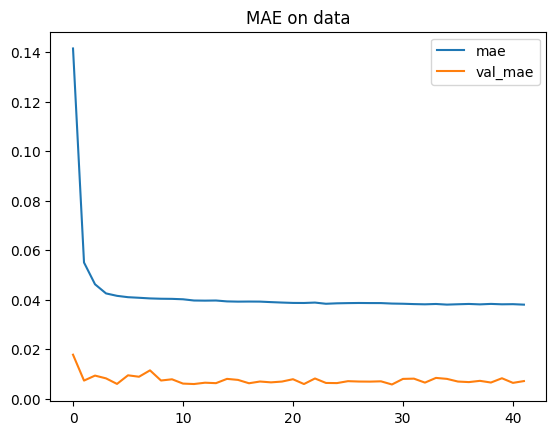

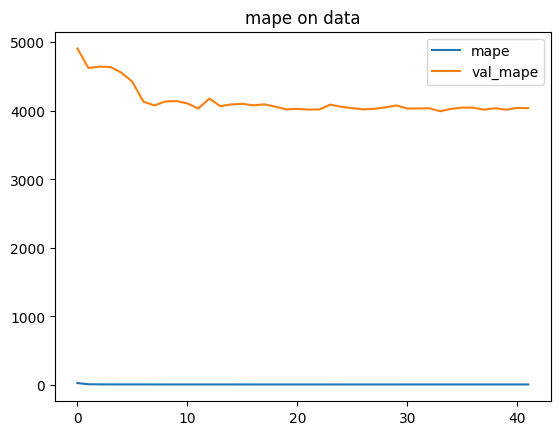

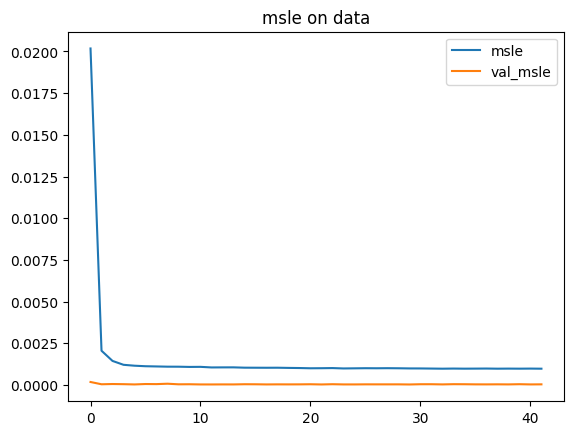

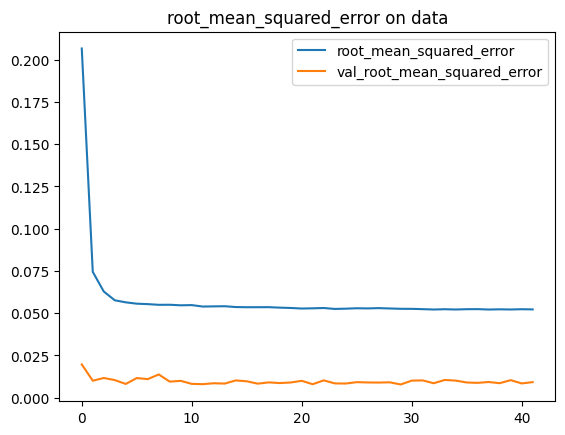

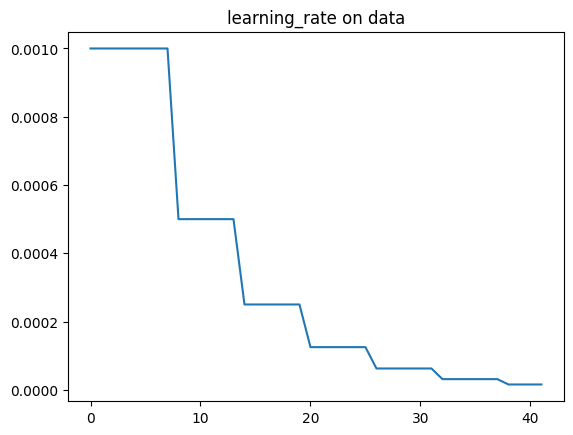

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
R^2 value for  GeneratedGBPUSD 
0.9987496343147085


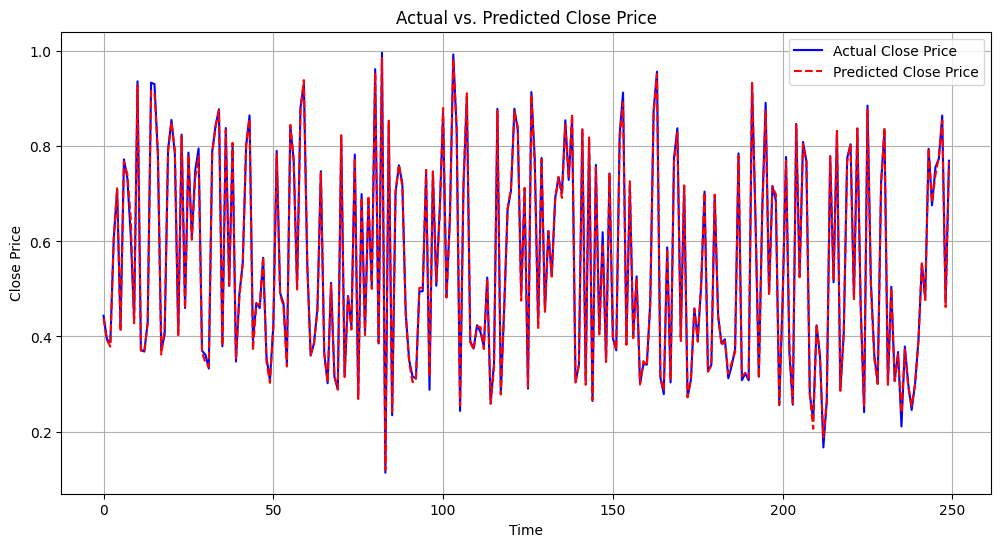

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
R^2 value for test  GeneratedGBPUSD 
0.861123281607459


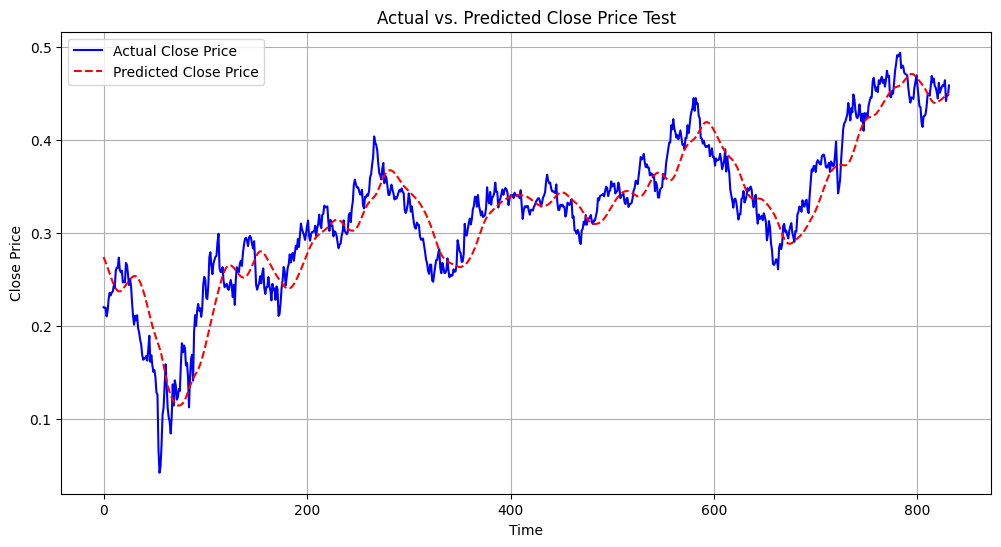

GeneratedUSDJPY 


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 168, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ (None, 168, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_34 (LSTM)                  │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,201 (1.11 MB)

 Trainable params: 292,201 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Epoch 1/100

Epoch 1: val_loss improved from inf to 0.00111, saving model to GeneratedUSDJPY lstm_best.keras
37/37 - 20s - 533ms/step - loss: 0.0267 - mae: 0.1042 - mape: 82.2856 - msle: 0.0135 - root_mean_squared_error: 0.1636 - val_loss: 0.0011 - val_mae: 0.0316 - val_mape: 12.2447 - val_msle: 5.4173e-04 - val_root_mean_squared_error: 0.0333 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_loss improved from 0.00111 to 0.00005, saving model to GeneratedUSDJPY lstm_best.keras
37/37 - 21s - 558ms/step - loss: 0.0029 - mae: 0.0376 - mape: 229.1399 - msle: 0.0012 - root_mean_squared_error: 0.0538 - val_loss: 4.9759e-05 - val_mae: 0.0050 - val_mape: 5.3847 - val_msle: 2.3640e-05 - val_root_mean_squared_error: 0.0071 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_loss did not improve from 0.00005
37/37 - 20s - 550ms/step - loss: 0.0024 - mae: 0.0341 - mape: 261.8668 - msle: 9.4769e-04 - root_mean_squared_error: 0.0489 - val_loss: 1.8422e-04 - val_mae: 0.0108 - val_mape: 4.5733 

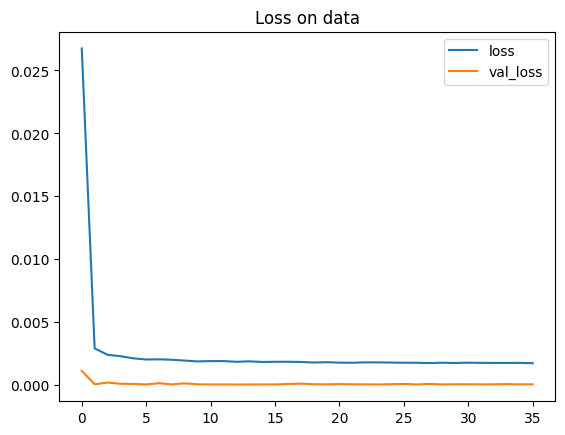

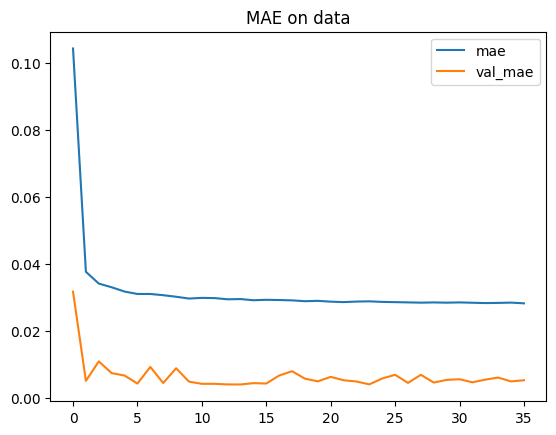

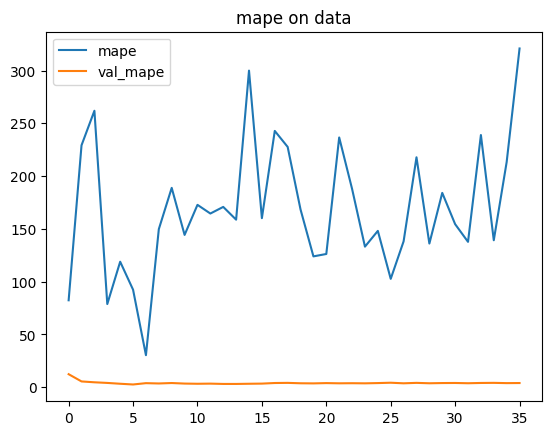

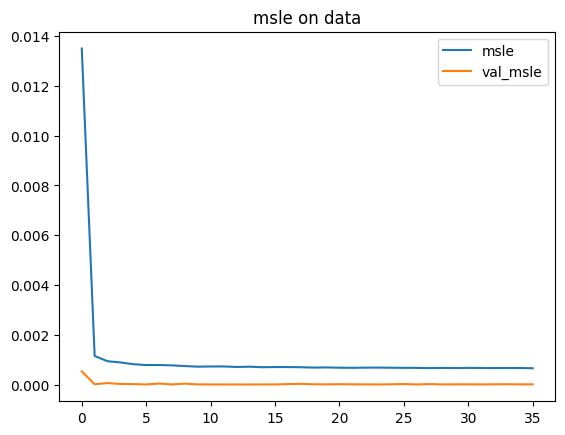

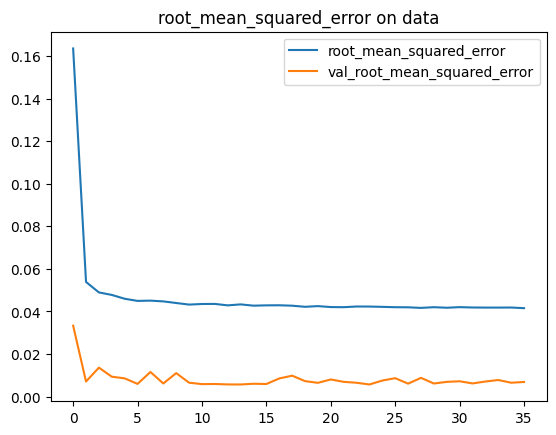

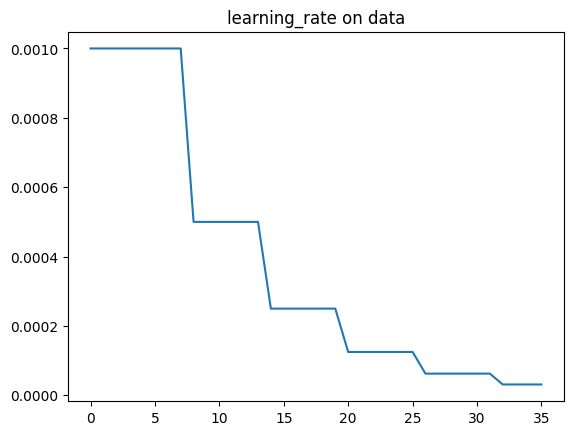

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
R^2 value for  GeneratedUSDJPY 
0.9994365526511942


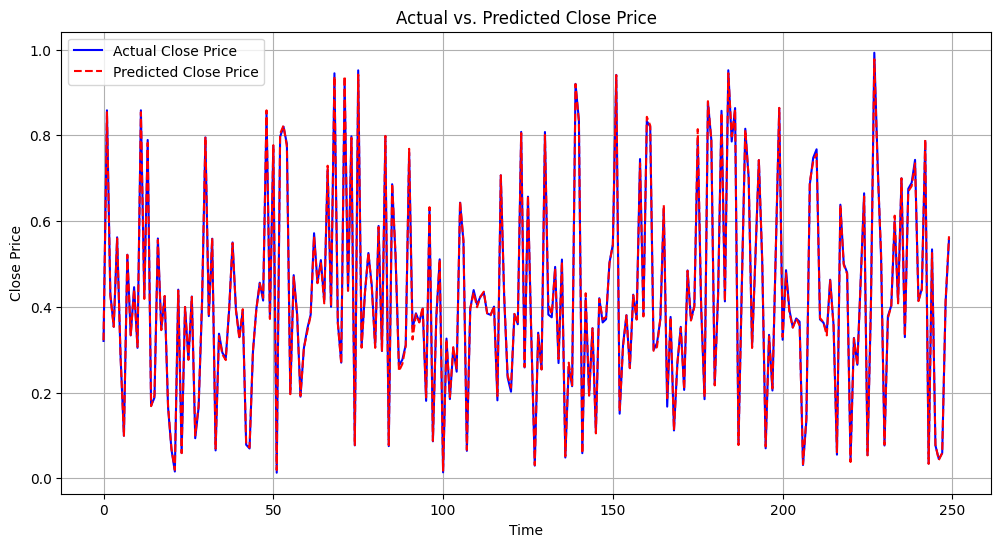

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R^2 value for test  GeneratedUSDJPY 
-980.4487020146405


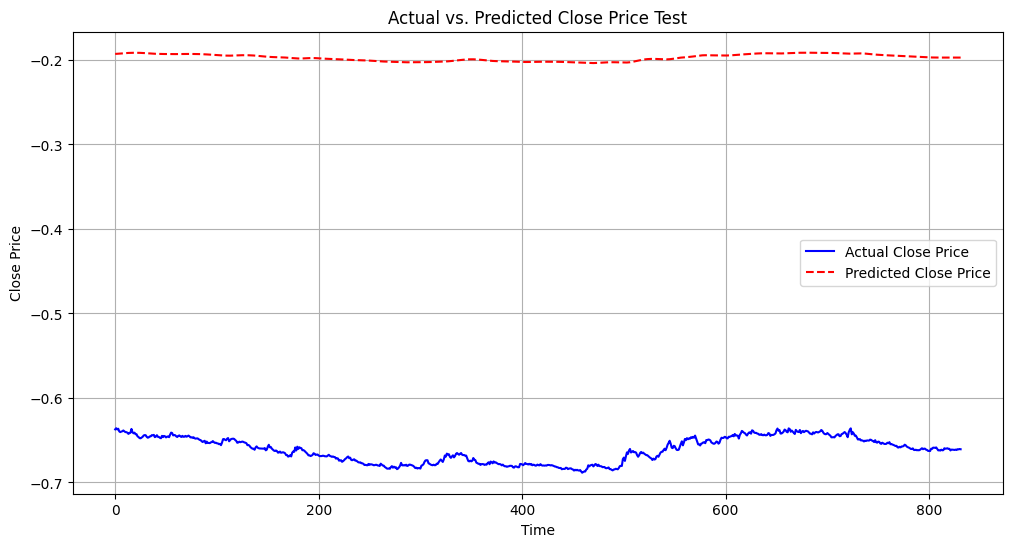

In [8]:
for i in range(len(train_dfs)):
    m_label = file_target[i].replace("dbot.csv","")
    train_df = train_dfs[i]
    train_df_test = train_dfs_test[i]
    print(m_label)
    SEQ_LEN = 168             # length of input sequence (timesteps). Typical choices: 30, 60, 90
    n_rows, n_features = train_df.values.shape
    scaler = MinMaxScaler(feature_range=(0, 1))
    s = scaler.fit_transform(train_df.values[:,-1:])
    s1 = scaler.transform(train_df_test.values[:,-1:])

    X, y = create_sequences(s, SEQ_LEN)  # X: (n_samples, SEQ_LEN, n_features), y: (n_samples, n_features)
    X1, y1 = create_sequences(s1, SEQ_LEN)  # X: (n_samples, SEQ_LEN, n_features), y: (n_samples, n_features)

    n_samples = X.shape[0]

    joblib.dump(scaler, m_label + 'scaler.joblib')



    y = y.reshape((y.shape[0],y.shape[1],1))

    y1 = y1.reshape((y1.shape[0],y1.shape[1],1))


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=False)
    X_val, X_test, y_val,  y_test = train_test_split(X_test, y_test, test_size=0.01, random_state=0, shuffle=False)

    seq_len = X_train.shape[1]
    n_features = X_train.shape[2]
    output_dim = y_train.shape[1]

    i = Input(shape=(seq_len, n_features))
    X = LSTM(100, return_sequences=True)(i)
    X = LSTM(100, return_sequences=True)(X)
    X = LSTM(100, return_sequences=True)(X)
    X = LSTM(100)(X)
    X = Dense(100, activation="relu")(X)
    X = Dropout(0.25)(X)
    X = Dense(output_dim)(X)

    model = Model(i, X)
    model.summary()
    visualkeras.layered_view(model, to_file= m_label + 'output.png',legend= True).show()

    es = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True, verbose=2)
    rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, min_lr=1e-6, verbose=2)
    mc = ModelCheckpoint(m_label + 'lstm_best.keras', monitor='val_loss', save_best_only=True, verbose=2)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae',tf.keras.metrics.RootMeanSquaredError(),'mape','msle'])
    r = model.fit(
      X_train, y_train,
      validation_data=(X_val, y_val),
      epochs=100,
      batch_size=2048,
      callbacks=[es, rlr, mc ],
      verbose=2

    )

    plt.title("Loss on data")
    plt.plot(r.history['loss'], label="loss")
    plt.plot(r.history['val_loss'], label="val_loss")
    plt.legend()
    plt.show()

    plt.title("MAE on data")
    plt.plot(r.history['mae'], label="mae")
    plt.plot(r.history['val_mae'], label="val_mae")
    plt.legend()
    plt.show()

    plt.title("mape on data")
    plt.plot(r.history['mape'], label="mape")
    plt.plot(r.history['val_mape'], label="val_mape")
    plt.legend()
    plt.show()

    plt.title("msle on data")
    plt.plot(r.history['msle'], label="msle")
    plt.plot(r.history['val_msle'], label="val_msle")
    plt.legend()
    plt.show()

    plt.title("root_mean_squared_error on data")
    plt.plot(r.history['root_mean_squared_error'], label="root_mean_squared_error")
    plt.plot(r.history['val_root_mean_squared_error'], label="val_root_mean_squared_error")
    plt.legend()
    plt.show()

    plt.title("learning_rate on data")
    plt.plot(r.history['learning_rate'], label="loss")
    plt.show()

    best_model = load_model(m_label + 'lstm_best.keras')
    y_pred = best_model.predict(X_test)
    print("R^2 value for ", m_label)
    print(r2_score(y_test.reshape((len(y_test),1)), y_pred.reshape((len(y_pred),1))))

    plt.figure(figsize=(12, 6))
    plt.plot(y_test[:, -1], label='Actual Close Price', color='blue')
    plt.plot(y_pred[:, -1], label='Predicted Close Price', color='red', linestyle='--')
    plt.title('Actual vs. Predicted Close Price')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.savefig('actual_vs_predicted.png')
    plt.show()

    y_pred = best_model.predict(X1)
    print("R^2 value for test ", m_label)
    print(r2_score(y1.reshape((len(y1),1)), y_pred.reshape((len(y_pred),1))))

    plt.figure(figsize=(12, 6))
    plt.plot(y1[:, -1], label='Actual Close Price', color='blue')
    plt.plot(y_pred[:, -1], label='Predicted Close Price', color='red', linestyle='--')
    plt.title('Actual vs. Predicted Close Price Test')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.savefig('actual_vs_predicted.png')
    plt.show()



In [9]:
"""
best_model = load_model(m_label + 'lstm_best.keras')
    y_pred = best_model.predict(X_test)
    print("R^2 value for ", m_label)
    print(r2_score(y_test.reshape((len(y_test),1)), y_pred.reshape((len(y_pred),1))))

    plt.figure(figsize=(12, 6))
    plt.plot(y_test[:, -1], label='Actual Close Price', color='blue')
    plt.plot(y_pred[:, -1], label='Predicted Close Price', color='red', linestyle='--')
    plt.title('Actual vs. Predicted Close Price')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.savefig('actual_vs_predicted.png')
    plt.show()

    y_pred = best_model.predict(X1)
    print("R^2 value for test ", m_label)
    print(r2_score(y1.reshape((len(y1),1)), y_pred.reshape((len(y_pred),1))))

    plt.figure(figsize=(12, 6))
    plt.plot(y1[:, -1], label='Actual Close Price', color='blue')
    plt.plot(y_pred[:, -1], label='Predicted Close Price', color='red', linestyle='--')
    plt.title('Actual vs. Predicted Close Price Test')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.savefig('actual_vs_predicted.png')
    plt.show()
"""

'\nbest_model = load_model(m_label + \'lstm_best.keras\')\n    y_pred = best_model.predict(X_test)\n    print("R^2 value for ", m_label)\n    print(r2_score(y_test.reshape((len(y_test),1)), y_pred.reshape((len(y_pred),1))))\n\n    plt.figure(figsize=(12, 6))\n    plt.plot(y_test[:, -1], label=\'Actual Close Price\', color=\'blue\')\n    plt.plot(y_pred[:, -1], label=\'Predicted Close Price\', color=\'red\', linestyle=\'--\')\n    plt.title(\'Actual vs. Predicted Close Price\')\n    plt.xlabel(\'Time\')\n    plt.ylabel(\'Close Price\')\n    plt.legend()\n    plt.grid(True)\n    plt.savefig(\'actual_vs_predicted.png\')\n    plt.show()\n\n    y_pred = best_model.predict(X1)\n    print("R^2 value for test ", m_label)\n    print(r2_score(y1.reshape((len(y1),1)), y_pred.reshape((len(y_pred),1))))\n\n    plt.figure(figsize=(12, 6))\n    plt.plot(y1[:, -1], label=\'Actual Close Price\', color=\'blue\')\n    plt.plot(y_pred[:, -1], label=\'Predicted Close Price\', color=\'red\', linestyle=\'--\

In [10]:
dir_contents = os.listdir(".")
t_symbol = joblib.load("symbol.joblib")
# Filter the list to include only files, not directories
# os.path.join is used to create a full path for isfile() to check
files = [item for item in dir_contents]

file_target = []

for filename in files:
    for t_s in t_symbol:
        if t_s in filename and "lstm_best.keras" in filename:
            print(filename)
            #file_target.append(filename)
print("----------------------------------------------------")

print(len(file_target))


GeneratedUSDZAR lstm_best.keras
GeneratedGBPUSD lstm_best.keras
GeneratedEURUSD lstm_best.keras
GeneratedNZDUSD lstm_best.keras
GeneratedUSDCAD lstm_best.keras
GeneratedUSDJPY lstm_best.keras
GeneratedUSDCHF lstm_best.keras
GeneratedAUDUSD lstm_best.keras
GeneratedUSDMXN lstm_best.keras
----------------------------------------------------
0


In [11]:


best_model = load_model(MODEL_SAVE_PATH)

NameError: name 'MODEL_SAVE_PATH' is not defined

In [ ]:
y_pred = best_model.predict(X_test)
print(y_pred)

In [ ]:
print(y_test)

In [ ]:

r2_score(y_test.reshape((len(y_test),1)), y_pred.reshape((len(y_pred),1)))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, -1], label='Actual Close Price', color='blue')
plt.plot(y_pred[:, -1], label='Predicted Close Price', color='red', linestyle='--')
plt.title('Actual vs. Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()

In [ ]:
# Save this as plot_forecast.py and run where your model, x_test, y_test (and optional scalers) are available.

import numpy as np
import matplotlib.pyplot as plt

def ensure_2d_preds(preds):
    """Normalize model.predict outputs to shape (n_samples, n_features)."""
    preds = np.asarray(preds)
    if preds.ndim == 3:
        # common case: (n_samples, 1, n_features) or (n_samples, seq_len, n_features)
        # we assume model outputs final-step predictions if seq_len>1
        if preds.shape[1] == 1:
            preds = preds[:, 0, :]
        else:
            preds = preds[:, -1, :]
    elif preds.ndim == 1:
        preds = preds.reshape(-1, 1)
    return preds

def plot_test_vs_pred_close(y_test, preds, output_index=-1, figsize=(12,5), savepath=None):
    """
    Plot actual vs predicted for the 'close' column (default last column).
    y_test: (n, n_features)
    preds: (n, n_features)
    """
    y_test = np.asarray(y_test)
    preds = np.asarray(preds)
    # normalize shapes
    preds = ensure_2d_preds(preds)

    actual_close = y_test[:, output_index]
    pred_close   = preds[:, output_index]

    plt.figure(figsize=figsize)
    plt.plot(actual_close, label='Actual Close')
    plt.plot(pred_close, label='Predicted Close')
    plt.xlabel('Time (test index)')
    plt.ylabel('Close price')
    plt.title('Actual vs Predicted Close Price (test set)')
    plt.legend()
    plt.grid(True)
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')
    plt.show()

def recursive_forecast(model, last_window, n_steps=2000):
    """
    Do recursive multi-step forecasting:
      - model.predict expects input shape (1, window_len, n_features)
      - last_window: shape (window_len, n_features)
      - returns array shape (n_steps, n_features)
    """
    last_window = last_window.reshape((len(last_window),1))
    if last_window.ndim != 2:
        raise ValueError("last_window must be 2D: (window_len, n_features)")

    window_len, n_features = last_window.shape
    history = last_window.copy()
    preds = []
    for i in range(n_steps):
        x_in = history.reshape(1, window_len, n_features)
        p = model.predict(x_in)
        p = ensure_2d_preds(p)[0]  # shape: (n_features,)
        preds.append(p)
        # slide window
        history = np.vstack([history[1:], p.reshape(1, n_features)])
    return np.vstack(preds)  # shape (n_steps, n_features)

def plot_extended_series(y_test, future_preds, output_index=-1, figsize=(14,5), savepath=None):
    """
    Plot the test-close series and appended future predictions as one continuous line.
    """
    actual_close = np.asarray(y_test)[:, output_index]
    future_close = np.asarray(future_preds)[:, output_index]
    combined = np.concatenate([actual_close, future_close])

    plt.figure(figsize=figsize)
    plt.plot(combined, label='Actual (test) + Forecast (future)')
    # mark border between known and forecast
    split_index = len(actual_close)
    plt.axvline(split_index - 0.5, linestyle='--', linewidth=1)
    plt.text(split_index + 5, combined[split_index], ' Forecast starts', va='center')
    plt.xlabel('Time (index)')
    plt.ylabel('Close price')
    plt.title(f'Actual Close (test) and {len(future_close)} Step Forecast')
    plt.legend()
    plt.grid(True)
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')
    plt.show()



In [ ]:
# ------------------------------------------------------------
# USAGE (example)
# ------------------------------------------------------------
# Assumptions:
# - x_test shape = (n_samples, window_len, n_features) e.g. (6247, 48, 4)
# - y_test shape = (n_samples, n_features) e.g. (6247, 4)
# - model.predict(x_test) -> (n_samples, n_features) (or shape convertible)
#
# Optional:
# - scaler_X (used during training on inputs) or scaler_y (used on outputs).
#   If present, inverse_transform predictions and y_test before plotting.
#
# Replace these names with your actual variables present in the workspace.

# Example (uncomment and run where variables exist):
preds_test = best_model.predict(X_test)
preds_test = ensure_2d_preds(preds_test)

# # 1) plot actual vs predicted (test)
plot_test_vs_pred_close(y_test, preds_test, output_index=-1, savepath='test_vs_pred.png')


In [ ]:
#
# # 2) recursive forecast next 2000 values starting from last input window:
last_window = X_test[-1].reshape((len(X_test[-1]),1))   # shape (window_len, n_features)
future_preds = recursive_forecast(best_model, last_window, n_steps=200)
future_preds_inv = future_preds

# # 3) plot extended series (append future close to test close)
plot_extended_series(y_test, future_preds_inv, output_index=-1, savepath='extended_forecast.png')
#
# # Optional: save future_preds_inv to disk
# # np.save('future_preds.npy', future_preds_inv)